# **KÜTÜPHANELERİ IMPORT ETME VE DATA'YI OKUMA**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# **DATASETİN YÜKLEMESİ, İNCELENMESİ VE DÜZENLENMESİ**

In [ ]:
df = pd.read_csv('waterquality.csv')

In [ ]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [ ]:
df.shape

(3276, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [ ]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
# NULLları kaldırır
df.dropna(inplace = True)

In [ ]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
df.shape

(2011, 10)

In [ ]:
# sutun isimlerini daha kullanilabilir hale getirir
df = df.rename({'pH' : 'pH',
                'Hardness' : 'sertlik',
                'Solids' : 'katılar',
                'Chloramines':'kloraminler',
                'Sulfate':'sülfat',
                'Conductivity':'iletkenlik',
                'Organic_carbon': 'organik_karbon',
                'Trihalomethanes': 'trihalometanlar',
                'Turbidity': 'bulanıklık',
                'Potability': 'içilebilirlik'
                }, axis = 1)

# SÜTUN ADLARININ ANLAMI:

* **pH:** Suyun asit-baz dengesinin değerlendirilmesinde önemli bir parametredir. Dünya Sağlık Örgütü (WHO), pH'nın maksimum izin verilen limitini 6,5 ila 8,5 arasında önermektedir.

* **Sertlik**:
Sertlik genellikle kalsiyum ve magnezyum tuzlarından kaynaklanır. Bu tuzlar, suyun geçtiği jeolojik depolardan çözünerek gelir. Suyun sertlik oluşturan materyalle temas süresi, ham su içinde ne kadar sertlik olduğunu belirlemeye yardımcı olur. Sertlik başlangıçta, Kalsiyum ve Magnezyum tarafından neden olunan sabunun çöktürülme kapasitesi olarak tanımlanmıştır.

* **Katılar:**
Su, potasyum, kalsiyum, sodyum, bikarbonatlar, klorürler, magnezyum, sülfatlar gibi geniş bir inorganik ve bazı organik mineralleri veya tuzları çözebilme yeteneğine sahiptir. Bu mineraller suyun görünümünde istenmeyen tat ve seyrelmiş renge neden olur. Yüksek toplam çözünmüş katılar (TÇK) değerine sahip su, suyun yüksek mineral içeriğine işaret eder. TÇK için istenilen sınır 500 mg/l'dir ve maksimum sınır içme suyu için 1000 mg/l olarak belirlenmiştir.

* **Kloraminler:**
Klor ve kloramin, kamu su sistemlerinde kullanılan başlıca dezenfektanlardır. Kloraminler, içme suyunu arıtmak için kloramonyum klorürün klor ile birleştirildiğinde en yaygın olarak oluşur. İçme suyunda 4 miligram litreye (mg/L veya 4 parça milyonda (ppm)) kadar olan klor seviyeleri güvenli kabul edilir.

* **Sülfat:**
Sülfatlar, minerallerde, toprakta ve kayalarda bulunan doğal olarak oluşan maddelerdir. Havada, yeraltı suyunda, bitkilerde ve yiyeceklerde bulunurlar.  Deniz suyundaki sülfat konsantrasyonu yaklaşık olarak litre başına 2.700 miligramdır (mg/L). Sülfat, çoğu tatlı su kaynağında 3 ila 30 mg/L arasında değişir, ancak bazı coğrafi konumlarda çok daha yüksek konsantrasyonlar (1000 mg/L) bulunur.

* **İletkenlik:**
Saf su, iyi bir iletken değil, aksine iyi bir yalıtkandır. İyon konsantrasyonundaki artış, suyun elektriksel iletkenliğini artırır. Genellikle, suyun içinde çözünmüş katıların miktarı elektriksel iletkenliği belirler. Elektriksel iletkenlik (EI) aslında bir çözeltinin iyonik sürecini ölçer ve bu sürecin akım iletilmesini sağlar. Dünya Sağlık Örgütü standartlarına göre, EI değeri 400 μS/cm'yi aşmamalıdır.

* **Organik Karbon:**
Kaynak sularındaki Toplam Organik Karbon (TOK), çürüyen doğal organik maddeden (NOM) ve sentetik kaynaklardan gelir. TOK, saf su içindeki organik bileşiklerdeki toplam karbon miktarını ölçer. ABD Çevre Koruma Ajansı'na göre, işlenmiş / içme suyunda TOK olarak <2 mg/L ve işlem için kullanılan kaynak suyunda <4 mg/Lit altında olmalıdır.

* **Trihalometanlar:**
THM'ler, klor ile arıtılan suda bulunabilen kimyasallardır. İçme suyundaki THM konsantrasyonu, suyun içindeki organik madde seviyesine, suyun arıtılması için gereken klor miktarına ve arıtılan suyun sıcaklığına bağlı olarak değişir. İçme suyunda THM seviyeleri 80 ppm'ye kadar güvenli kabul edilir.

* **Bulanıklık:**
Suyun bulanıklığı, askıda katı halde bulunan madde miktarına bağlıdır. Bu, suyun ışık yayan özelliklerinin bir ölçüsüdür ve test, kolloidal madde açısından atık deşarjının kalitesini belirtmek için kullanılır. Wondo Genet Kampüsü için elde edilen ortalama bulanıklık değeri (0,98 NTU), WHO'nun önerdiği 5,00 NTU'lik değerin altındadır.

* **İçilebilirlik:**
Suyun insan tüketimi için güvenli olup olmadığını gösterir, 1 içilebilir ve 0 içilemez anlamına gelir.









In [ ]:
df.head()

ph     sertlik       katılar  kloraminler      sülfat  iletkenlik  \
3   8.316766  214.373394  22018.417441     8.059332  356.886136  363.266516   
4   9.092223  181.101509  17978.986339     6.546600  310.135738  398.410813   
5   5.584087  188.313324  28748.687739     7.544869  326.678363  280.467916   
6  10.223862  248.071735  28749.716544     7.513408  393.663396  283.651634   
7   8.635849  203.361523  13672.091764     4.563009  303.309771  474.607645   

   organik_karbon  trihalometanlar  bulanıklık  içilebilirlik  
3       18.436524       100.341674    4.628771              0  
4       11.558279        31.997993    4.075075              0  
5        8.399735        54.917862    2.559708              0  
6       13.789695        84.603556    2.672989              0  
7       12.363817        62.798309    4.401425              0

In [ ]:
# datasetin temel istatistiksel özelliklerinin incelenmesi
# burada kategorik datalar gözükmez
df.describe().loc[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']].T.style.background_gradient(axis = 1)

# **KATEGORİK, SAYISAL VE KARDİNAL VERİLERİN TESPİTİ**


* **Kategorik(Kalitatif, Nitel) Veri :** Ölçülemeyen, üzerinden sayısal işlem yapılamayan nesnel verilerdir. Cinsiyet, saç rengi vb. nitel özellikleri belirten veriler.Nitel veriyle veri kümesindeki gözlemlere ilişkin sıfatlar ya da durumlar tespit edilir.

* **Numerik(Kantitatif,Nicel) Veri :** Ölçülebilen, üzerinde aritmetik işlemler yapılabilen veri tipidir.

* **Kardinal Veri:**
Bu veri tipi; veri bilimi ve istatistikte, bir değişkenin alabileceği farklı değerlerin sayısını ifade eder. Bu terim, özellikle kategorik veriler için kullanılır. Kardinal veri tipi, bir değişkenin kaç farklı kategorik deperi olduğunu belirtir.

In [ ]:
# sutun tespiti için bir fonksiyon olusturduk
def column_detection(dataframe: pd.DataFrame, cat_th: int=10, car_th: int=20):
  # kategorik sütunların listesini oluşturur.
  cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "object"]
  # sayısal olmakla birlikte kategorik gibi davranan sütunları belirler.
  num_but_cat = [col for col in dataframe.columns
                 if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "object"]
  # kategorik olmasına rağmen kardinal (yüksek benzersiz değer) gibi davranan sütunları belirler.
  cat_but_car = [col for col in dataframe.columns
                 if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "object"]
  # kategorik sütunlar ve sayısal ancak kategorik gibi davranan sütunlar birleştirilir.
  cat_cols = cat_cols + num_but_cat
  # kardinal olan sütunlar, kategorik sütunlardan çıkarılır.
  cat_cols = [col for col in cat_cols
              if col not in cat_but_car]

  # sayısal sütunların listesini oluşturur.
  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "object"]
  # kategorik gibi davranan sütunlar, sayısal sütunlardan çıkarılır.
  num_cols = [col for col in num_cols if col not in num_but_cat]

  print("\n##################### KATEGORİK  #####################")
  print(cat_cols)
  print("\n##################### NUMERİK #####################")
  print(num_cols)
  print("\n##################### KATEGORİK GİBİ GÖRÜNEN KARDİNALLER #####################")
  print(cat_but_car)
  print("\n##################### NUMERİK GİBİ GÖRÜNEN KATEGORİKLER #####################")
  print(num_but_cat)

  print("\n##################### SÜTUN İNCELEMESİ #####################")
  print(f"Kaç sütun var?: {dataframe.shape[0]}")
  print(f"Sütunlar hangi değişkenlere sahip?: {dataframe.shape[1]}")
  print(f"Kategorik sütun sayısı: {len(cat_cols)}")
  print(f"Numerik sütun sayısı: {len(num_cols)}")
  print(f"Kategorik gibi görülen kardinal sütun sayısı: {len(cat_but_car)}")
  print(f"Numerik gibi görülen kategorik sütun sayısı: {len(num_but_cat)}")

  return cat_cols, num_cols, cat_but_car, num_but_cat

In [ ]:
cat_cols, num_cols, cat_but_car, num_but_cat = column_detection(df)


##################### KATEGORİK  #####################
['içilebilirlik']

##################### NUMERİK #####################
['ph', 'sertlik', 'katılar', 'kloraminler', 'sülfat', 'iletkenlik', 'organik_karbon', 'trihalometanlar', 'bulanıklık']

##################### KATEGORİK GİBİ GÖRÜNEN KARDİNALLER #####################
[]

##################### NUMERİK GİBİ GÖRÜNEN KATEGORİKLER #####################
['içilebilirlik']

##################### SÜTUN İNCELEMESİ #####################
Kaç sütun var?: 2011
Sütunlar hangi değişkenlere sahip?: 10
Kategorik sütun sayısı: 1
Numerik sütun sayısı: 9
Kategorik gibi görülen kardinal sütun sayısı: 0
Numerik gibi görülen kategorik sütun sayısı: 1


# **KATEGORİK VE SAYISAL DEĞİŞKENLERİN GÖRSELLEŞTİRİLMESİ**

               içilebilirlik  Yüzdelik oran
içilebilirlik                              
0                       1200      59.671805
1                        811      40.328195


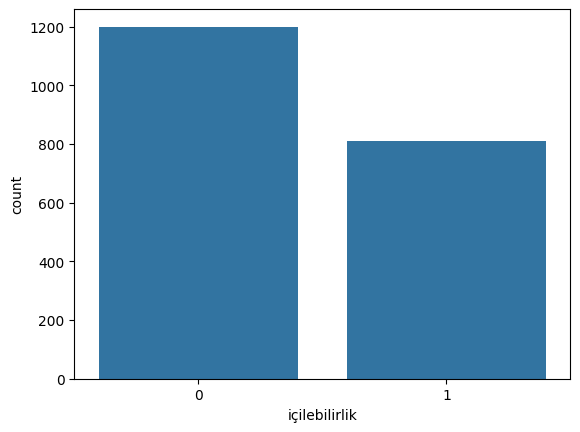

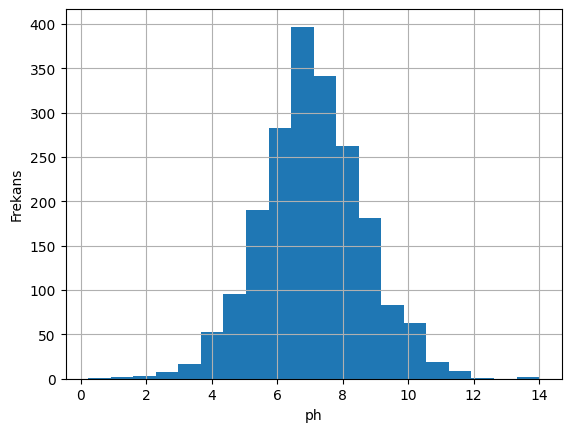

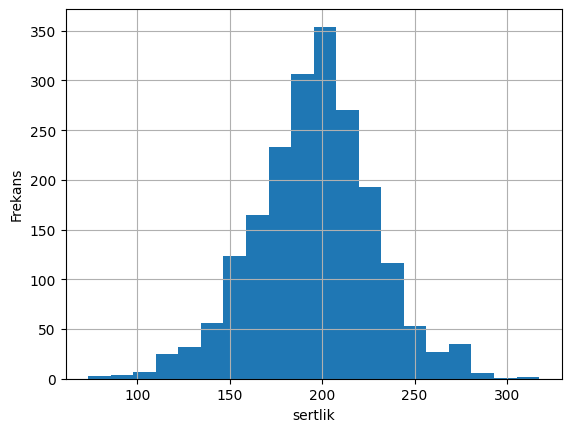

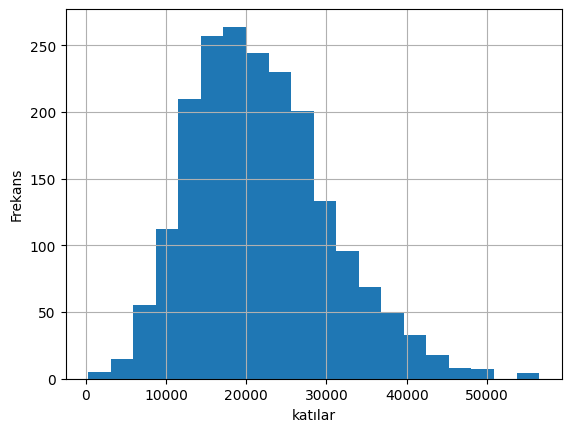

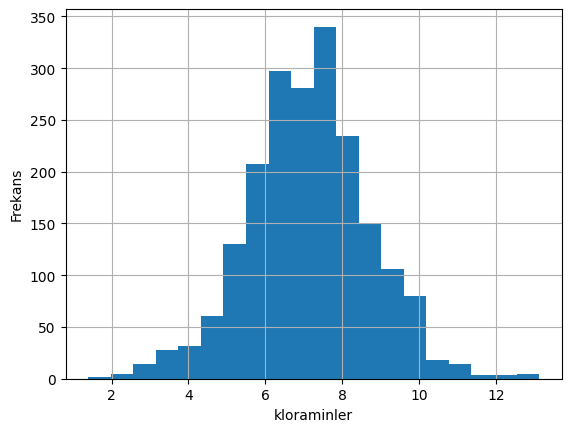

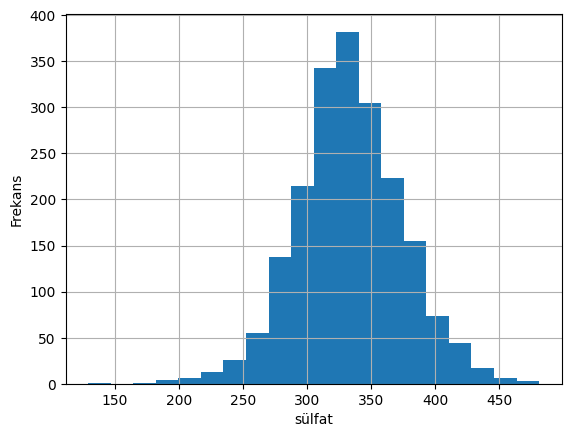

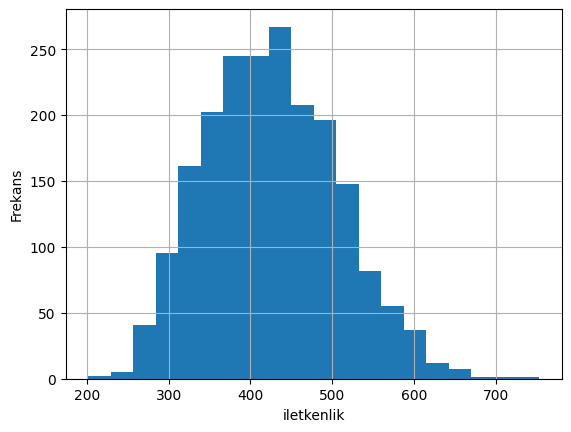

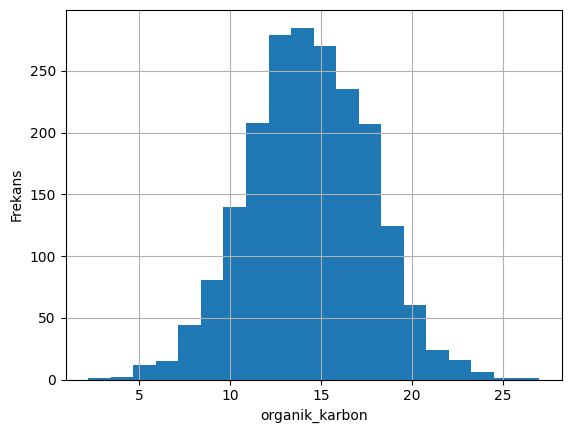

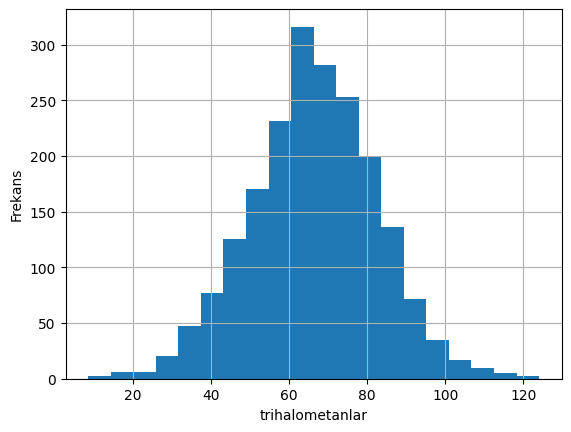

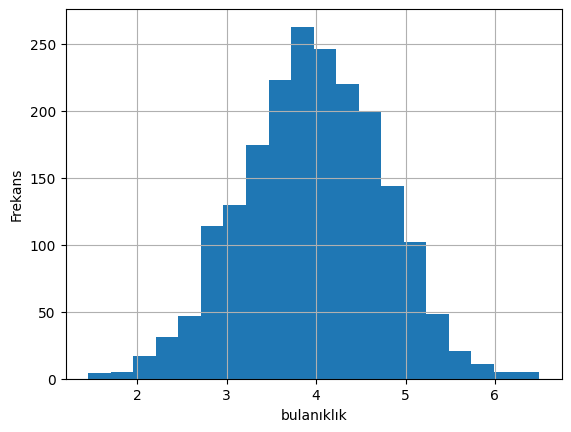

In [ ]:
def cat_summary(dataframe, col_name, plot = True):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Yüzdelik oran": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        sns.countplot(x = dataframe[col_name], data = dataframe)
        plt.show(block = True)


for col in cat_cols:
    cat_summary(df, col)


def hist_num_columns_show(dataframe, num_column):
    dataframe[num_column].hist(bins = 20)
    # bins=20 argümanı, veriyi kaç aralığa böleceğimizi kontrol eder.
    plt.xlabel(num_column)
    plt.ylabel("Frekans")
    plt.show(block = True)


for num_col in num_cols:
    hist_num_columns_show(df, num_col)

* **cat_summary** fonksiyonu tarafından oluşturulan grafikler:
 * Her bir kategorik değişken için bir çubuk grafik oluşturulur.
 * Çubuk grafikteki yükseklik, her kategorinin frekansını temsil eder.
 * Grafikteki x ekseni, kategorik değişkenin farklı kategorilerini ve y ekseni, her bir kategorinin frekansını gösterir.
 * Grafiklerin yanında, her bir kategorinin yüzde oranını içeren bir tablo da bulunur. Bu, kategorinin veri setinde ne kadarlık bir orana sahip olduğunu belirtir.

* **hist_num_columns_show** fonksiyonu tarafından oluşturulan grafikler:
 * Her bir sayısal değişken için bir histogram oluşturulur.
 * Her bir bar, belirli bir aralıktaki gözlemlerin sayısını temsil eder.
 * Histogramın x ekseni, sayısal değişkenin değerlerini ve y ekseni, her bir aralıktaki gözlemlerin frekansını gösterir.
 * Histogramın altında x ekseni etiketi olarak sayısal sütunun adı, y ekseni etiketi olarak ise "Frekans" yazılır.

# her sayısal değerin her bir diğer sayısal değişkenle olan ilişkisi:

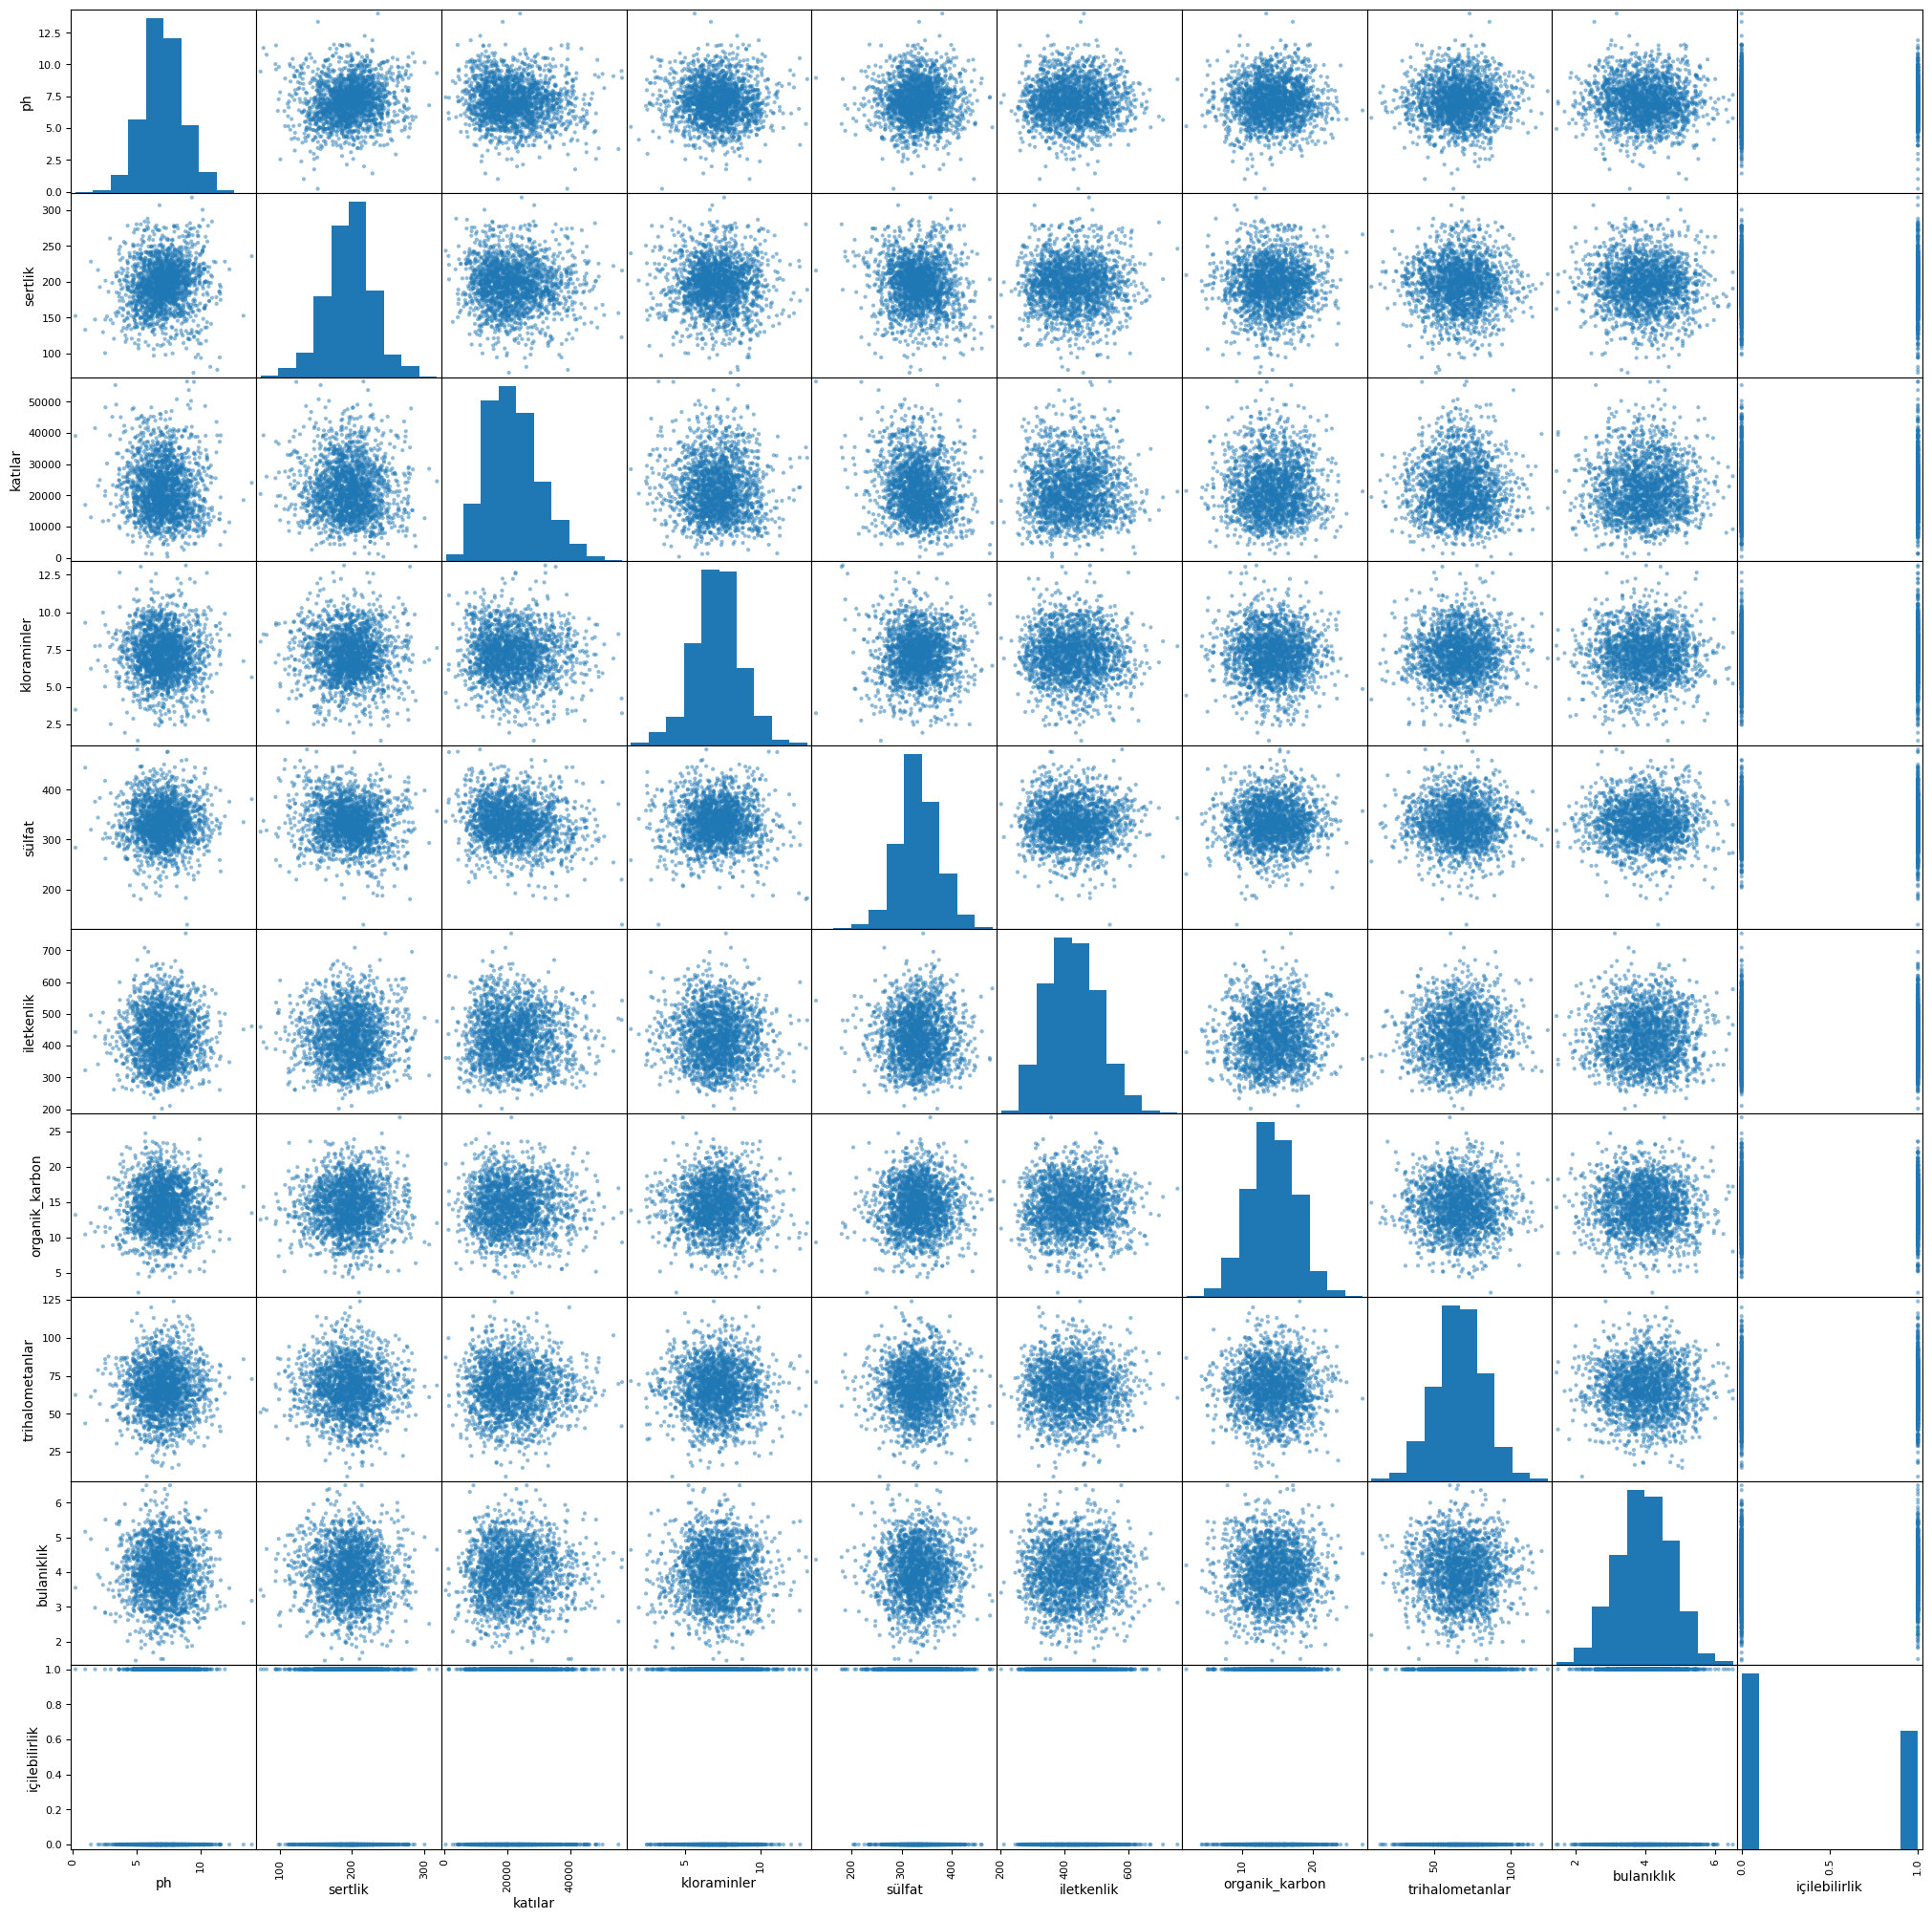

In [ ]:
from pandas.plotting import scatter_matrix
p = scatter_matrix(df, figsize = (25, 25))

* **Ana Diyagonal:**

 * Ana diyagonal boyunca, her değişkenin kendi dağılımını gösteren histogramlar yer alır. Bu histogramlar, her bir değişkenin dağılımının merkezi eğilimini, yayılımını ve şeklini gösterir.

* **Üst ve Alt Üçgenler:**

 * Üst ve alt üçgenler, aynı çiftler arasındaki ilişkiyi gösterir.

 * Her bir hücredeki noktaların dağılımı, iki değişken arasındaki ilişkiyi gösterir. Noktaların yoğun olduğu bölgeler, iki değişken arasında güçlü bir ilişki olduğunu gösterebilir.

 * Eğilim çizgileri, iki değişken arasındaki ilişkiyi daha net bir şekilde görselleştirebilir. Eğer eğilim çizgisi dik bir açıyla yükseliyorsa, pozitif bir ilişki olduğunu; düşük bir açıyla yükseliyorsa, negatif bir ilişki olduğunu gösterebilir.

# kategorik değerin her bir sayısal değer için incelenmesi:

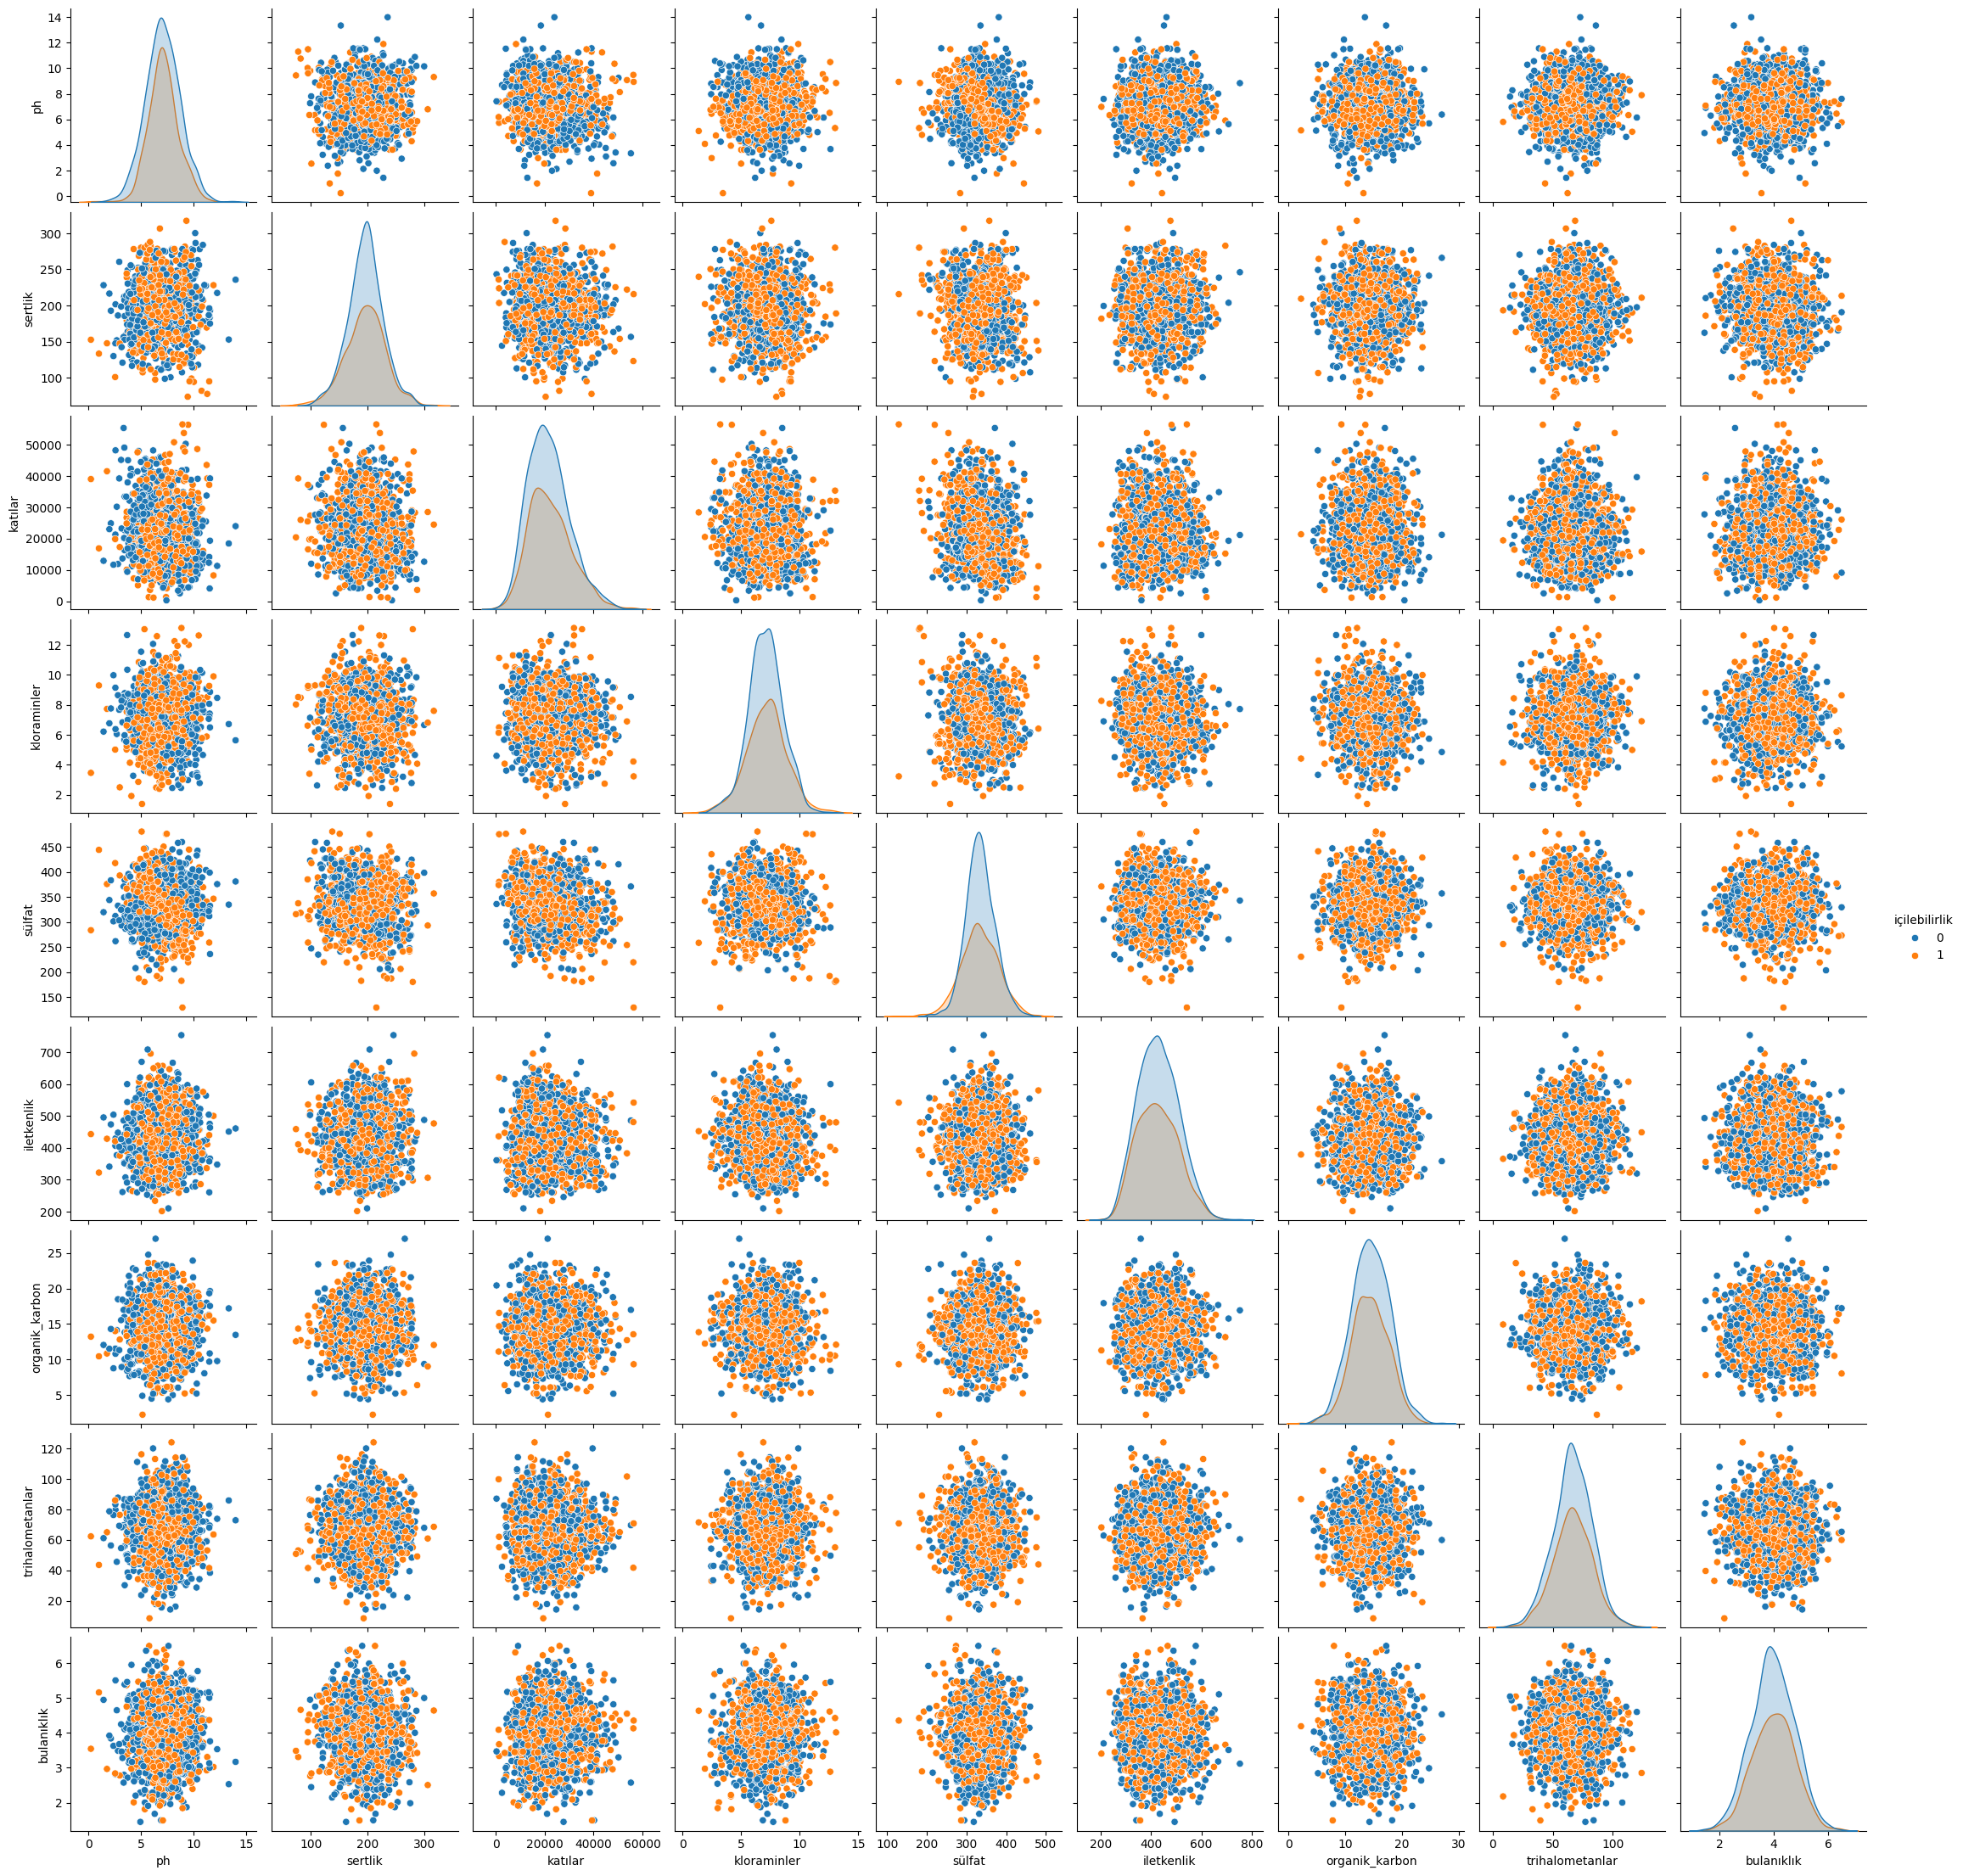

In [ ]:
sns.pairplot(df, hue = 'içilebilirlik')

* sns.pairplot işlevi de bir DataFrame'deki sayısal değişkenler arasındaki ilişkileri görselleştirir. Ancak, **hue** argümanı kullanılarak belirtilen bir kategorik değişkene göre veriler renklendirilir.
* Ana diyagonal boyunca, her bir değişkenin kendi dağılımını gösteren histogramlar yer alır.
* Üst ve alt üçgenlerde, her bir değişken çifti arasında noktalardan oluşan scatter plotlar bulunur. Bu scatter plotlar, iki değişken arasındaki ilişkiyi gösterir.
* hue argümanı belirtildiğinde, her bir kategorik değer için farklı renklerde noktalar gösterilir. Bu, belirli bir kategorik değişkenin diğer değişkenlerle olan ilişkisini renkler aracılığıyla görselleştirir.


# suyun içilebilirliğinin pasta grafiklerinde incelenmesi:


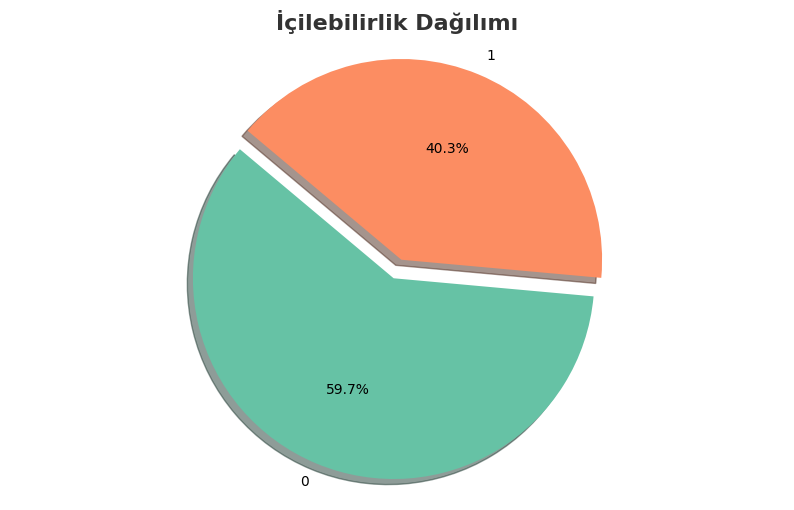

In [ ]:
potability_counts = df['içilebilirlik'].value_counts()

explode = (0.1, 0)

plt.figure(figsize=(10, 6))
plt.pie(potability_counts, labels=potability_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66c2a5', '#fc8d62'], explode=explode, shadow=True)
plt.title('İçilebilirlik Dağılımı', fontsize = 16, fontweight = 'bold', color = '#333333')
plt.axis('equal')
plt.show()

# sülfat değerlerinin normal dağılıma yakın grafikte incelenmesi:


<Axes: title={'center': 'Normal Dağılıma Yakın'}, xlabel='sülfat', ylabel='Density'>

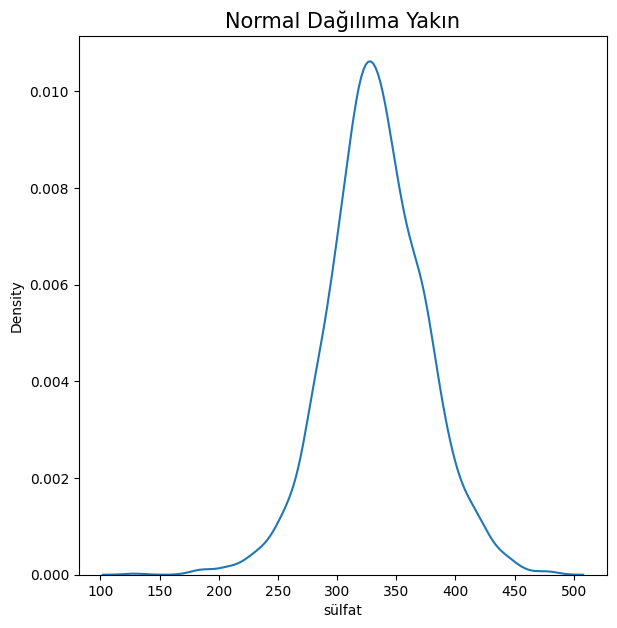

In [ ]:
plt.figure(figsize = (15, 7))
plt.subplot(1, 2, 1)
plt.title("Normal Dağılıma Yakın", fontsize = 15)
sns.kdeplot(data = df["sülfat"])

# nokta grafiği ile pH ve organik karbon değerlerine bakarak içilebilirlik incelenmesi:

In [ ]:
fig = px.scatter(df, x = "ph", y="organik_karbon", color = "içilebilirlik")
fig.show()

* **x ekseni (ph):** Grafikte, x ekseni ph değerlerini temsil eder. pH, suyun asitlik veya bazlık derecesini ölçen bir ölçümdür. Bu eksende her bir nokta, veri setindeki farklı ph değerlerini temsil eder.

* **y ekseni (organik_karbon):** Grafikte, y ekseni organik karbon değerlerini temsil eder. Organik karbon, suyun organik maddeler içerme derecesini gösterir. Bu eksende her bir nokta, veri setindeki farklı organik karbon değerlerini temsil eder.

* **Renklendirme (içilebilirlik):** Noktalar, içilebilirlik adlı kategorik bir değişkene göre renklendirilir. Bu, grafikteki noktaların içilebilirlik özelliğine göre farklı renklerde gösterildiği anlamına gelir. Her bir renk, içilebilirlik durumunu temsil eder.

# farklı ph değerlerinin her birine karşılık gelen ortalama sertlik değerlerini karşılaştırarak, bu iki değişken arasındaki ilişkinin incelenmesi:

<Axes: xlabel='ph', ylabel='sertlik'>

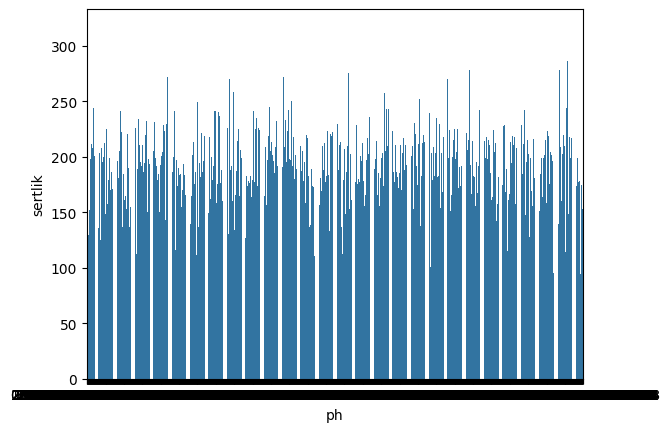

In [ ]:
sns.barplot(x = df["ph"], y = df["sertlik"])

* Çubuk grafikte x ekseni, veri setindeki ph sütunundaki farklı kategorik değerleri temsil eder. Bu değerler, örneğin farklı su örneklerinin pH seviyeleri olabilir.
* Çubuk grafikte y ekseni, her bir ph değeri için sertlik değişkeninin ortalamasını temsil eder. Y ekseni, ortalama sertlik değerlerini gösterir. Çubukların yüksekliği, her bir ph değerine karşılık gelen ortalama sertlik değerini belirtir.

# **DEĞİŞKENLER ARASI İLİŞKİLER**

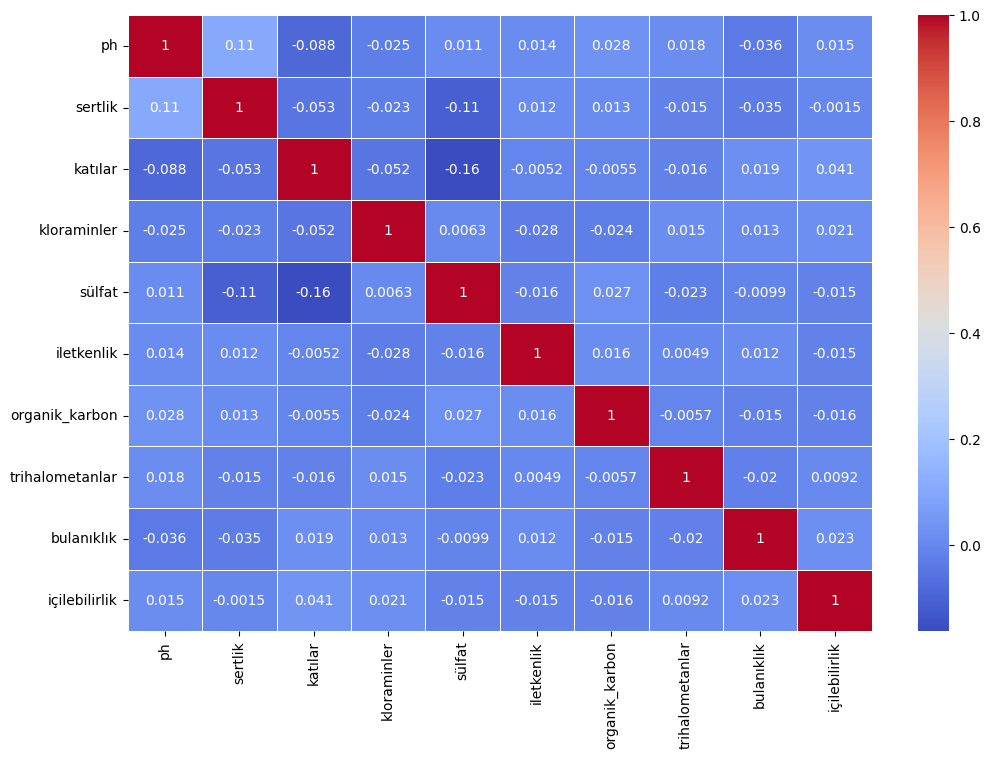

In [ ]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(),annot = True, cmap = 'coolwarm', linewidths = 0.4);

* Her kare, iki değişken arasındaki korelasyonu temsil eder. Karelerin rengi, korelasyonun gücünü gösterir.

* Eğer bir karede bir sayı varsa, bu sayı ilgili değişkenler arasındaki korelasyon katsayısını ifade eder.

 * **+1: Mükemmel pozitif korelasyon:**
 Bu, bir değişkenin değeri artarken diğer değişkenin de değerinin arttığı anlamına gelir.

 * **0: Korelasyon yok veya çok zayıf korelasyon:** Bu, değişkenler arasında herhangi bir ilişki olmadığı veya çok zayıf bir ilişki olduğu anlamına gelir.

 * **-1: Mükemmel negatif korelasyon:**  Bu, bir değişkenin değeri artarken diğer değişkenin de değerinin azaldığı anlamına gelir.


# **FEATURE ENGINEERING**

# Grafik Tekniklerle Aykırı Değerler

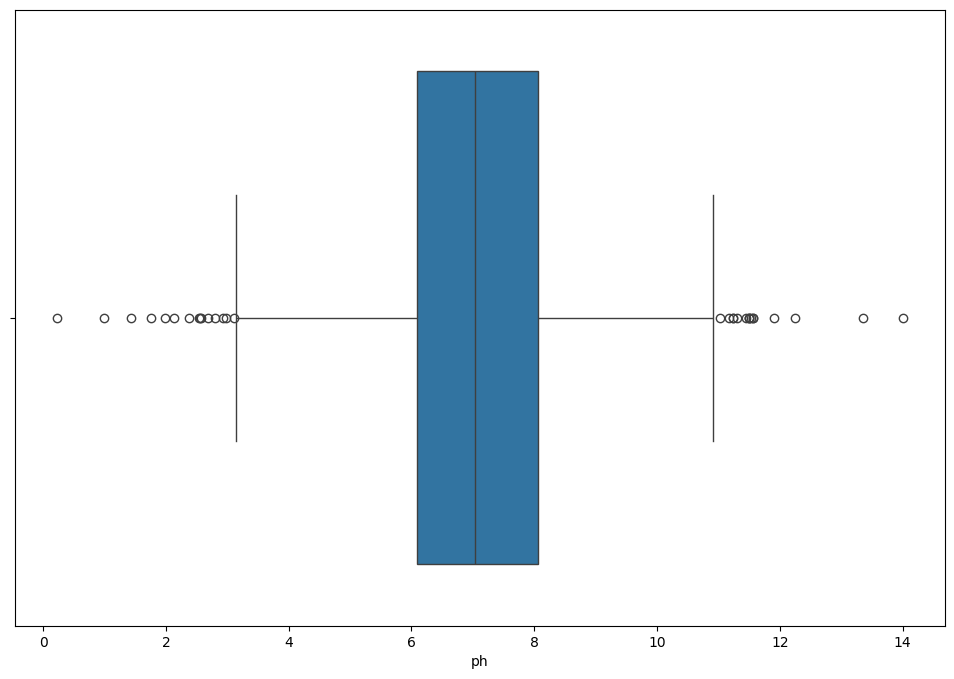

In [ ]:
plt.figure(figsize = (12, 8))
sns.boxplot(x = df["ph"])
plt.show(block = True)

* **IQR (Interquarfile Range)**, bir veri kümesindeki verilerin dağılımının merkezini ve yayılmasını ölçmek için kullanılan bir istatistiksel kavramdır. Özellikle outlier(aykırı değer) tespitinde kullanılır.

* IQR, bir datasetin çeyreklerine dayalı olarak hesaplanır. İlk olarak, dataseti sıralanır. Ardından, datasetin yüzde 25'lik(Q1), yüzde 50'lik(Q2, yani medyan) ve yüzde 75'lik (Q3) pzoisyonları bulunur. IQR, Q3 ile Q1 arasındaki farktır demektir.

* IQR datadetin ortasında yer alan verilerin yayılmasını ölçer, IQR ne kadar büyükse, veri noktaları o kadar geniş bir aralıkta değilmiş demektir.

In [ ]:
def outlier_thresholds(dataframe: pd.DataFrame, col_name: str, q1=0.25, q3=0.75):
  quartile1 = dataframe[col_name].quantile(q1)
  quartile3 = dataframe[col_name].quantile(q3)

  interquantile_range = quartile3 - quartile1

  up_limit = quartile3 + 1.5*interquantile_range
  low_limit = quartile1 + 1.5*interquantile_range

  return low_limit, up_limit

In [ ]:
outlier_thresholds(df,"ph")

(9.034591473157624, 10.997836820777836)

In [ ]:
def check_outlier(dataframe: pd.DataFrame, col_name: str):
  low_limit, up_limit = outlier_thresholds(dataframe, col_name)

  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
    return True #herhangi bir true değer varsa döndür
  else:
    return False

In [ ]:
check_outlier(df,"ph")

True

In [ ]:
ortalama = sdf["ph"].mean()
print(ortalama)

7.085989839285033


In [ ]:
low_limit, up_limit = outlier_thresholds(df,"ph")

In [ ]:
#aykırı değerleri ortalama ile değiştirir

outlier_min = df[df["ph"]<low_limit]["ph"]
outlier_max = df[df["ph"]>up_limit]["ph"]

outliers = pd.concat([outlier_min,outlier_max], axis = 0).index

indexes=[]

for i in outliers:
  indexes.append(i)

df.loc[indexes,"ph"]=ortalama

print(df["ph"][indexes])

3       7.08599
5       7.08599
7       7.08599
10      7.08599
12      7.08599
         ...   
2925    7.08599
2945    7.08599
3017    7.08599
3108    7.08599
3269    7.08599
Name: ph, Length: 1814, dtype: float64


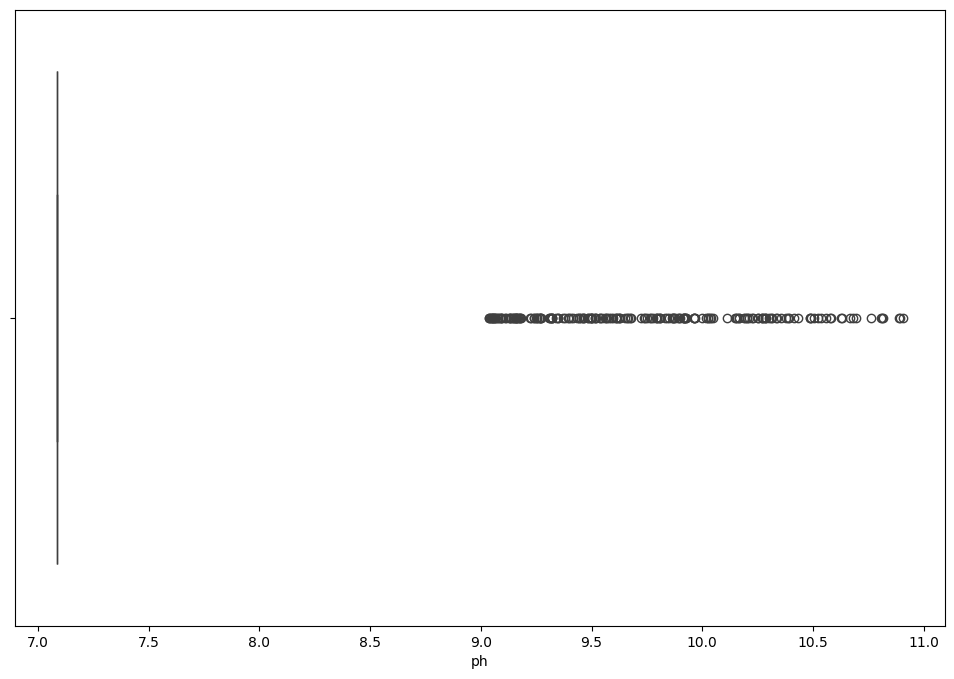

In [ ]:
plt.figure(figsize = (12,8))
sns.boxplot(x = df["ph"])
plt.show(block = True)

In [ ]:
len(df["ph"].unique())

198

In [ ]:
ortalama=df["ph"].mean()
print(ortalama)

7.345827425861408
